In [1]:
%pylab inline
import pandas as pd
import gzip
import cPickle as pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
from constants import *
from empirical_results import aggregate_results

# Cross validation of b 

In [3]:
with gzip.open(SAVEFOLDER+'result_cross_validation_b.pickle', 'r') as f:
    dataset = pickle.load(f)
del dataset['DynamicSolinf']
result_DF = aggregate_results(dataset, alpha=20., spread=np.ones(390)*0.0002)

2015-07-09 15:33:27,837 - INFO - test daysset(['20121101', '20121031', '20121102', '20121105', '20121106', '20121026', '20121024', '20121025', '20121022', '20121023'])
2015-07-09 15:33:27,838 - INFO - Processing day 20121101
2015-07-09 15:33:31,165 - INFO - Processing day 20121031
2015-07-09 15:33:33,687 - INFO - Processing day 20121102
2015-07-09 15:33:36,135 - INFO - Processing day 20121105
2015-07-09 15:33:38,402 - INFO - Processing day 20121106
2015-07-09 15:33:40,697 - INFO - Processing day 20121026
2015-07-09 15:33:43,000 - INFO - Processing day 20121024
2015-07-09 15:33:45,124 - INFO - Processing day 20121025
2015-07-09 15:33:47,255 - INFO - Processing day 20121022
2015-07-09 15:33:49,373 - INFO - Processing day 20121023


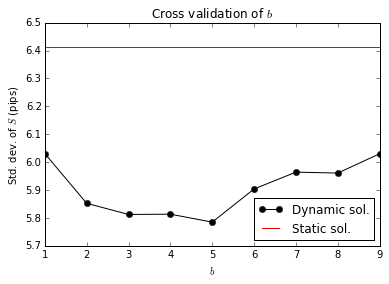

In [6]:
bs = range(1,10)
plot(bs, np.array([result_DF['Stilde_DynamicSolinf_b_%d'%i].std() for i in bs])*10000, 'ko-', 
     label='Dynamic sol.')
plot(bs, [result_DF.Stilde_StaticSol.std()*1E4]*len(bs), 'r', label='Static sol.')
legend(loc='lower right')
xlabel('$b$')# (bandwidth of covariance mat.)')
ylabel('Std. dev. of $S$ (pips)')
title('Cross validation of $b$')
savefig(GRAPHICSFOLDER+'cross_validation_b.pdf')

# Aggregate Results

In [3]:
with gzip.open(SAVEFOLDER+'result_f_1_b_3_W_20_days.pickle', 'r') as f:
    dataset = pickle.load(f)
result_DF = aggregate_results(dataset, alpha=90., spread=np.ones(390)*0.0002)

2015-07-23 00:43:00,061 - INFO - test daysset(['20121203', '20121206', '20121207', '20121204', '20121205', '20121116', '20121129', '20121128', '20121220', '20121107', '20121109', '20121108', '20121121', '20121120', '20121127', '20121126', '20121219', '20121218', '20121214', '20121217', '20121211', '20121210', '20121213', '20121212', '20121119', '20121130', '20121114', '20121115', '20121112', '20121113'])
2015-07-23 00:43:00,063 - INFO - Processing day 20121203
2015-07-23 00:43:05,356 - INFO - Processing day 20121206
2015-07-23 00:43:10,150 - INFO - Processing day 20121207
2015-07-23 00:43:15,709 - INFO - Processing day 20121204
2015-07-23 00:43:20,538 - INFO - Processing day 20121205
2015-07-23 00:43:29,490 - INFO - Processing day 20121116
2015-07-23 00:43:35,305 - INFO - Processing day 20121129
2015-07-23 00:43:40,588 - INFO - Processing day 20121128
2015-07-23 00:43:45,248 - INFO - Processing day 20121220
2015-07-23 00:43:49,864 - INFO - Processing day 20121107
2015-07-23 00:43:54,58

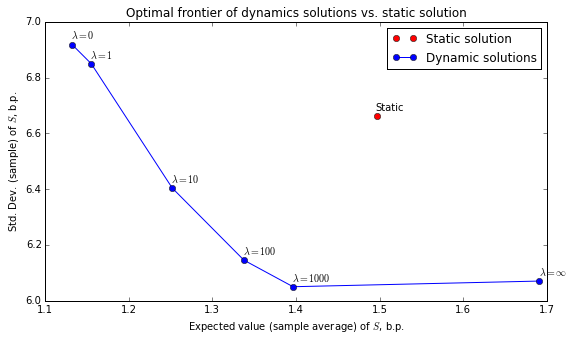

In [51]:
# redo the ordering
solutions = [el for el in dataset.columns if el.find('Sol')>-1]

labels = ['Static',
 '$\lambda = 0$',
 '$\lambda = 1$',
 '$\lambda = 10$',
 '$\lambda = 100$',
'$\lambda = 1000$',
'$\lambda = \infty$'
]

Es = [result_DF['Stilde_' + el].mean()*10000 for el in solutions]
Stds = [result_DF['Stilde_' + el].std()*10000 for el in solutions]
figure(figsize=(9,5))
plot(Es[0], Stds[0], 'ro')
plot(np.array(Es[1:]), Stds[1:], 'b-o')
for i in range(len(solutions)):
    annotate(labels[i], (Es[i]-1E-3, Stds[i]+2E-2))
#xlim([-.62, -0.52])
#ylim([5.95, 7.0])
title('Optimal frontier of dynamics solutions vs. static solution')
ylabel('Std. Dev. (sample) of $S$, b.p.')
xlabel('Expected value (sample average) of $S$, b.p.')
legend(['Static solution', 'Dynamic solutions'])
savefig(GRAPHICSFOLDER+'optimal_frontier_graph.pdf')

# Ex-Post Validation of Variance approximation

In [15]:
print "Empirical var. of S with static solution  %.2e" % result_DF.Stilde_StaticSol.var()
term1=((result_DF.Stilde_StaticSol - result_DF.Cost_StaticSol)**2).mean()
term2= result_DF.Cost_StaticSol.var()
print "First term: %.2e" % term1
print "Second term: %.2e" % term2
print "ratio %.2f%%" %(100*term2/term1)

Empirical var. of S with static solution  4.44e-07
First term: 4.45e-07
Second term: 6.34e-09
ratio 1.43%


In [14]:
print "Empirical var of S with dynamic solution %.2e" % result_DF.Stilde_DynamicSolinf.var()
term1= ((result_DF.Stilde_DynamicSolinf - result_DF.Cost_DynamicSolinf)**2).mean()
term2= result_DF.Cost_DynamicSolinf.var()
print "First term: %.2e" % term1
print "Second term: %.2e" % term2
print "ratio %.2f%%" %(100*term2/term1)

Empirical var of S with dynamic solution 3.69e-07
First term: 3.60e-07
Second term: 1.92e-08
ratio 5.33%


In [17]:
print "Empirical var of S with dynamic solution %.2e" % result_DF['Stilde_DynamicSol0.00e+00'].var()
term1 = ((result_DF['Stilde_DynamicSol0.00e+00'] - result_DF['Cost_DynamicSol0.00e+00'])**2).mean()
term2 = result_DF['Cost_DynamicSol0.00e+00'].var()
print "First term: %.2e" % term1
print "Second term: %.2e" % term2
print "ratio %.2f%%" %(100*term2/term1)

Empirical var of S with dynamic solution 4.79e-07
First term: 4.76e-07
Second term: 5.50e-09
ratio 1.15%


#Old Plots

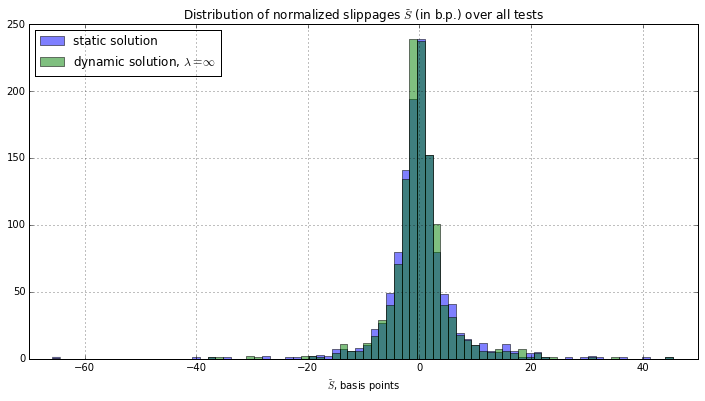

In [16]:
figure(figsize=(12,6))
_,bins,_=hist(result_DF.Stilde_StaticSol*10000, bins=80, alpha=.5, label='static solution')
(result_DF.Stilde_DynamicSolinf*10000).hist(bins=bins, alpha=.5, label='dynamic solution, $\lambda = \infty$')
title('Distribution of normalized slippages $\\tilde S$ (in b.p.) over all tests')
xlim([-.007*10000, 0.005*10000])
#ylim([0,230])
legend(loc='upper left')
xlabel('$\\tilde S$, basis points')
savefig(GRAPHICSFOLDER+'distribution_normalized_slippages.pdf')

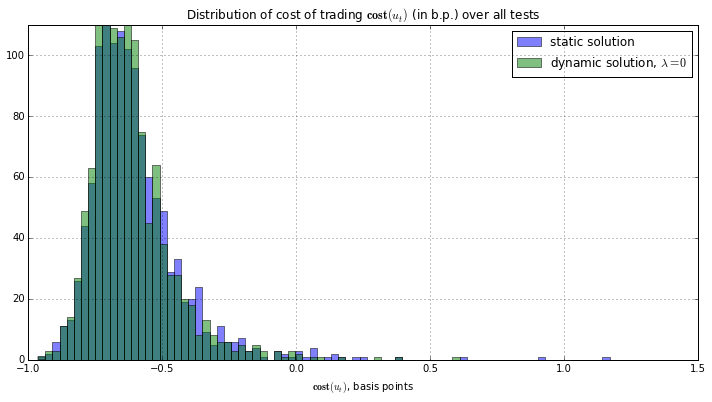

In [17]:
figure(figsize=(12,6))
_,bins,_=hist(result_DF.Cost_StaticSol*10000, bins=80, alpha=.5, label='static solution')
(result_DF['Cost_DynamicSol0.00e+00']*10000).hist(bins=bins, alpha=.5, label='dynamic solution, $\lambda = 0$')
title('Distribution of cost of trading $\mathbf{cost}(u_t)$ (in b.p.) over all tests')
#xlim([-.0001*10000, 0.000025*10000])
ylim([0,110])
legend(loc='upper right')
xlabel('$\mathbf{cost}(u_t)$, basis points')
savefig(GRAPHICSFOLDER+'distribution_cost_trading.pdf')

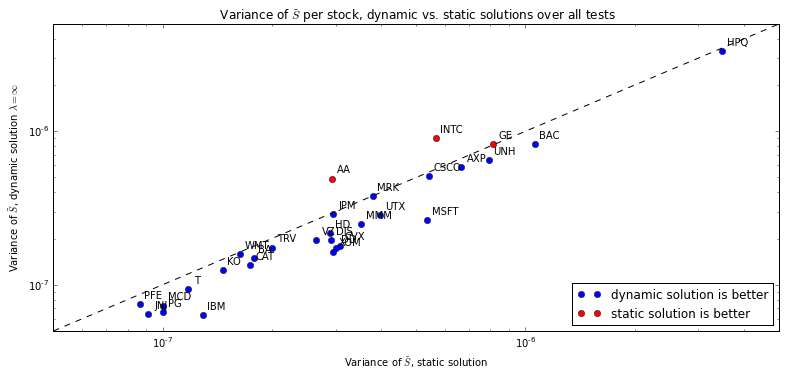

In [14]:
limits = 5E-8, 5E-6
by_stock_base = result_DF.groupby('Symbol').S_StaticSol.var()
by_stock_stoch_ctrl = result_DF.groupby('Symbol').S_DynamicSolinf.var()
figure(figsize=(13,5.5))
better_idx = (by_stock_base > by_stock_stoch_ctrl)
plot(by_stock_base.ix[better_idx], by_stock_stoch_ctrl.ix[better_idx], 'bo', label = 'dynamic solution is better')
plot(by_stock_base.ix[~(better_idx)], by_stock_stoch_ctrl.ix[~(better_idx)], 'ro', label = 'static solution is better')
for label in by_stock_base.index:
    text(by_stock_base[label]*1.035, by_stock_stoch_ctrl[label]*1.09, label)
plot(limits,limits, 'k--' )
yscale('log')
xscale('log')
xlim(limits)
ylim(limits)
xlabel('Variance of $\\tilde S $, static solution')
ylabel('Variance of $\\tilde S $, dynamic solution $\lambda = \infty$')
_= legend(loc='lower right')
title(' Variance of $\\tilde S$ per stock, dynamic vs. static solutions over all tests')
savefig(GRAPHICSFOLDER+'per_stock_variances.pdf')

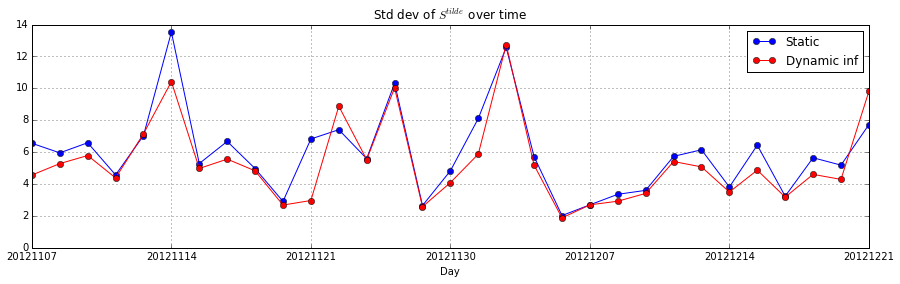

In [17]:
figure(figsize=(15,4))
(result_DF.groupby('Day').Stilde_StaticSol.std()*1E4).plot(label='Static', style='o-')
(result_DF.groupby('Day').Stilde_DynamicSolinf.std()*1E4).plot(label='Dynamic inf', style='ro-')
title('Std dev of ${S}^{tilde}$ over time')
legend()

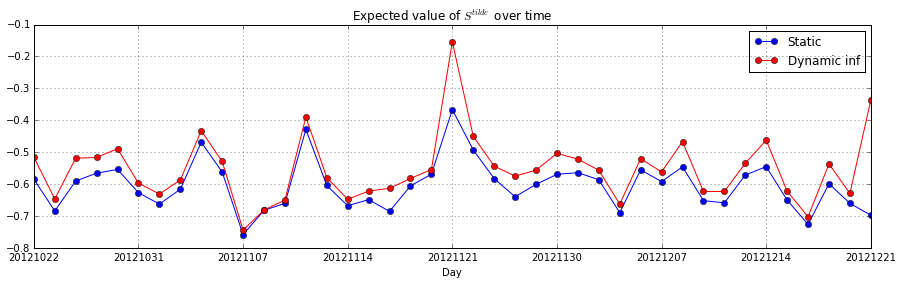

In [29]:
figure(figsize=(15,4))
(result_DF.groupby('Day').Cost_StaticSol.mean()*1E4).plot(label='Static', style='o-')
(result_DF.groupby('Day').Cost_DynamicSolinf.mean()*1E4).plot(label='Dynamic inf', style='ro-')
title('Expected value of ${S}^{tilde}$ over time')
legend()

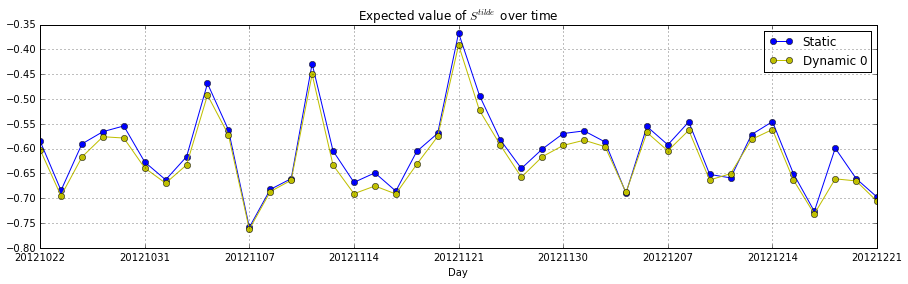

In [33]:
figure(figsize=(15,4))
(result_DF.groupby('Day').Cost_StaticSol.mean()*1E4).plot(label='Static', style='o-')
(result_DF.groupby('Day')['Cost_DynamicSol0.00e+00'].mean()*1E4).plot(label='Dynamic 0', style='yo-')
title('Expected value of ${S}^{tilde}$ over time')
legend()

# Sample solution - one day 

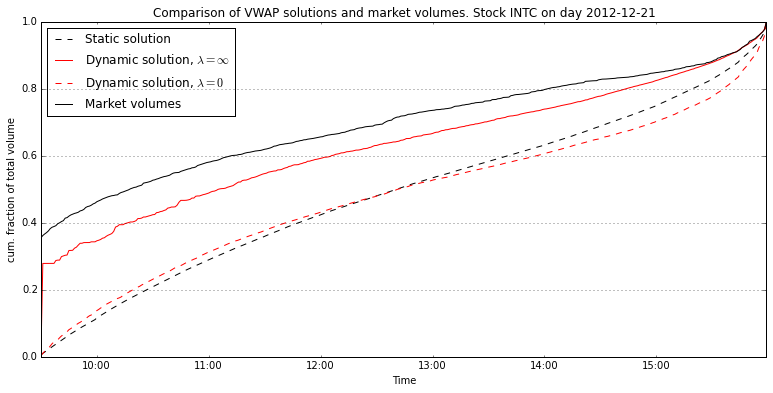

In [7]:
np.random.seed(0)
day = '20121221'#np.random.choice(dataset.Day.unique())
symbol = np.random.choice(dataset.Symbol.unique())
sample_day = dataset[(dataset.Day == day)&(dataset.Symbol == symbol)]
C = sample_day.StaticSol.sum()
V = sample_day.Volume.sum()
figure(figsize=(13,6))
sample_day = sample_day.set_index('Time')
(sample_day.StaticSol.cumsum()/C).plot(style= 'k--',label='Static solution')
(sample_day['DynamicSolinf'].cumsum()/C).plot(style= 'r-',label='Dynamic solution, $\lambda = \infty$')
(sample_day['DynamicSol0.00e+00'].cumsum()/C).plot(style= 'r--',label='Dynamic solution, $\lambda = 0$')
(sample_day.Volume.cumsum()/V).plot(style= 'k', label='Market volumes')
legend(loc='upper left')
ylim([0,1.])
ylabel('cum. fraction of total volume')
title('Comparison of VWAP solutions and market volumes. Stock %s on day %s' %(symbol, pd.to_datetime(day).date()))
plt.savefig(GRAPHICSFOLDER+'sample_day_solution.pdf')

# Look at one day 

In [ ]:
result_DF[result_DF.Symbol == 'HPQ']

In [ ]:
result_DF[result_DF.DevS_DynamicSolinf > 0.003]

In [ ]:
day = '20121128'
symbol = 'BAC'
sample_day = dataset[(dataset.Day == day)&(dataset.Symbol == symbol)]
C = sample_day.StaticSol.sum()
V = sample_day.Volume.sum()
figure(figsize=(13,12))
sample_day = sample_day.set_index('Time')
(sample_day.StaticSol.cumsum()/C).plot()
for column in [el for el in dataset.columns if el[:7] == 'Dynamic']:
    (sample_day[column].cumsum()/C).plot()
(sample_day.Volume.cumsum()/V).plot()
legend(loc='upper left')
print result_DF[(result_DF.Day == day) &(result_DF.Symbol == symbol)].T
figure()
dataset[(dataset.Day == day)&(dataset.Symbol == symbol)].Price.plot()

In [ ]:
sample_day.DynamicSolinf[-30:].plot()
sample_day.StaticSol[-30:].plot()
(sample_day.Volume[-30:]/100.).plot()

# This is choice of f and b

In [ ]:
with gzip.open(SAVEFOLDER+'result_f_1_b_1.pickle', 'r') as f:
    with open(SAVEFOLDER+'result_f_1_b_1.pickle_unzip', 'w') as g:
        g.writelines(f)
dataset = pd.read_pickle(SAVEFOLDER+'result_f_1_b_1.pickle_unzip')

In [ ]:
with gzip.open(SAVEFOLDER+'result_f_2_b_3.pickle', 'r') as f:
    dataset = pickle.load(f)

In [ ]:
def compute_expect_s_tilde(market_volumes, execution, spread, alpha):
    C = sum(execution)
    result = -sum(spread*np.abs(execution))/2.
    result += sum(spread*(execution**2/market_volumes))*alpha/2
    return result/C

def compute_var_s_tilde(market_volumes, execution, market_prices):
    market_VWAP = sum(market_volumes*market_prices)/sum(market_volumes)
    execution_VWAP = sum(execution*market_prices)/sum(execution)
    return ((market_VWAP - execution_VWAP)/market_VWAP)**2

solutions = ['StaticSol', 'DynamicSolinf'] 
result_DF = pd.DataFrame(columns = ['Symbol','Day'] + ['ES_'+el for el in solutions] + 
                         ['VarS_'+el for el in solutions])

test_days = dataset.Day.unique()
logger.info('test days' + str(test_days))
s_t = np.ones(390)*0.0001
alpha = 10.
for day in test_days:
    logger.info(day) 
    for symbol in ALL_SYMBOLS:
        sample_day = dataset[(dataset.Day == day)&(dataset.Symbol == symbol)]
        if len(sample_day) == 0:
            continue
        Es = np.zeros(len(solutions))
        Vars = np.zeros(len(solutions))
        for i,solution in enumerate(solutions):
            #print solution
            Es[i] = compute_expect_s_tilde(sample_day.Volume, sample_day[solution], s_t, alpha)
            Vars[i] = compute_var_s_tilde(sample_day.Volume, sample_day[solution], sample_day.Price)
        result_DF.loc[len(result_DF)] = [symbol, day] + list(Es) + list(Vars)

In [ ]:
result_DF.mean()*1E7 # f = 2, b = 3

In [ ]:
result_DF.mean()*1E7 # b = 1

In [ ]:
result_DF.mean()*1E7 # b = 3

In [ ]:
result_DF.mean()*1E7 # b = 5

In [ ]:
plot(result_DF.groupby('Day').VarS_StaticSol.mean()) # 2 3
plot(result_DF.groupby('Day').VarS_DynamicSolinf.mean())

In [ ]:
plot(result_DF.groupby('Day').VarS_StaticSol.mean()) # 1 3
plot(result_DF.groupby('Day').VarS_DynamicSolinf.mean())

### f  =2 b = 3

In [ ]:
by_stock_base = result_DF.groupby('Symbol').VarS_StaticSol.mean()
by_stock_stoch_ctrl = result_DF.groupby('Symbol').VarS_DynamicSolinf.mean()
figure(figsize=(12,7))
better_idx = (by_stock_base > by_stock_stoch_ctrl)
plot(by_stock_base.ix[better_idx], by_stock_stoch_ctrl.ix[better_idx], 'bo', label = 'improved')
plot(by_stock_base.ix[~(better_idx)], by_stock_stoch_ctrl.ix[~(better_idx)], 'ro', label = 'worsened')
for label in by_stock_base.index:
    text(by_stock_base[label], by_stock_stoch_ctrl[label], label)
maxval=max(by_stock_base.max(), by_stock_stoch_ctrl.max())
minval=min(by_stock_base.min(), by_stock_stoch_ctrl.min())
plot([minval,maxval],[minval,maxval], 'k--' )
yscale('log')
xscale('log')
xlim([minval,maxval]) ## FIX THESE
ylim([minval,maxval]) ## FIX THESE
xlabel('base, var(S~)')
ylabel('stoch control, var(S~)')
_= legend(loc='lower right')
title('Variance of $S-tilde$ per stock, stoch ctrl vs. static')

### b = 5

In [ ]:
by_stock_base = result_DF.groupby('Symbol').VarS_StaticSol.mean()
by_stock_stoch_ctrl = result_DF.groupby('Symbol').VarS_DynamicSolinf.mean()
figure(figsize=(12,7))
better_idx = (by_stock_base > by_stock_stoch_ctrl)
plot(by_stock_base.ix[better_idx], by_stock_stoch_ctrl.ix[better_idx], 'bo', label = 'improved')
plot(by_stock_base.ix[~(better_idx)], by_stock_stoch_ctrl.ix[~(better_idx)], 'ro', label = 'worsened')
for label in by_stock_base.index:
    text(by_stock_base[label], by_stock_stoch_ctrl[label], label)
maxval=max(by_stock_base.max(), by_stock_stoch_ctrl.max())
minval=min(by_stock_base.min(), by_stock_stoch_ctrl.min())
plot([minval,maxval],[minval,maxval], 'k--' )
yscale('log')
xscale('log')
xlim([minval,maxval]) ## FIX THESE
ylim([minval,maxval]) ## FIX THESE
xlabel('base, var(S~)')
ylabel('stoch control, var(S~)')
_= legend(loc='lower right')
title('Variance of $S-tilde$ per stock, stoch ctrl vs. static')

### b = 1 

In [ ]:
by_stock_base = result_DF.groupby('Symbol').VarS_StaticSol.mean()
by_stock_stoch_ctrl = result_DF.groupby('Symbol').VarS_DynamicSolinf.mean()
figure(figsize=(12,7))
better_idx = (by_stock_base > by_stock_stoch_ctrl)
plot(by_stock_base.ix[better_idx], by_stock_stoch_ctrl.ix[better_idx], 'bo', alpha=.7, label = 'improved')
plot(by_stock_base.ix[~(better_idx)], by_stock_stoch_ctrl.ix[~(better_idx)], 'ro', alpha=.7, label = 'worsened')
for label in by_stock_base.index:
    text(by_stock_base[label], by_stock_stoch_ctrl[label], label)
maxval=max(by_stock_base.max(), by_stock_stoch_ctrl.max())
minval=min(by_stock_base.min(), by_stock_stoch_ctrl.min())
plot([minval,maxval],[minval,maxval], 'k--' )
yscale('log')
xscale('log')
xlim([minval,maxval]) ## FIX THESE
ylim([minval,maxval]) ## FIX THESE
xlabel('base, var(S~)')
ylabel('stoch control, var(S~)')
_= legend(loc='lower right')
title('Variance of $S-tilde$ per stock, stoch ctrl vs. static')

### b = 3 

In [ ]:
by_stock_base = result_DF.groupby('Symbol').VarS_StaticSol.mean()
by_stock_stoch_ctrl = result_DF.groupby('Symbol').VarS_DynamicSolinf.mean()
figure(figsize=(12,7))
better_idx = (by_stock_base > by_stock_stoch_ctrl)
plot(by_stock_base.ix[better_idx], by_stock_stoch_ctrl.ix[better_idx], 'bo', label = 'improved')
plot(by_stock_base.ix[~(better_idx)], by_stock_stoch_ctrl.ix[~(better_idx)], 'ro', label = 'worsened')
for label in by_stock_base.index:
    text(by_stock_base[label], by_stock_stoch_ctrl[label], label)
maxval=max(by_stock_base.max(), by_stock_stoch_ctrl.max())
minval=min(by_stock_base.min(), by_stock_stoch_ctrl.min())
plot([minval,maxval],[minval,maxval], 'k--' )
yscale('log')
xscale('log')
xlim([minval,maxval]) ## FIX THESE
ylim([minval,maxval]) ## FIX THESE
xlabel('base, var(S~)')
ylabel('stoch control, var(S~)')
_= legend(loc='lower right')
title('Variance of $S-tilde$ per stock, stoch ctrl vs. static')